# Correlation

Use the Pandas library to analyze five semiconductor stocks  stocks—`INTC`, `AMD`, `MU`, `NVDA`, and `TSM`—and choose the stock with the least correlation to `JNJ` and `HD`.

The reason to choose stocks that are less correlated to other stocks is to diversify a portfolio.

Go [here](https://www.investopedia.com/terms/d/diversification.asp) to learn more about diversification and how correlation among stocks in portfolios are a factor in minimizing risk.

## 1. Import libraries and dependencies.
  - Import the `pandas`,`seaborn` and `pathlib` libraries, and set the `%matplotlib inline` property.


In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

## 2. Create `Path` Objects
   - Create a path objects for each `csv` file using the `Pathlib` library.

In [2]:
# Set file paths
hd_data = Path("../Resources/HD.csv")
jnj_data = Path("../Resources/JNJ.csv")
intc_data = Path("../Resources/INTC.csv")
amd_data = Path("../Resources/AMD.csv")
mu_data = Path("../Resources/MU.csv")
nvda_data = Path("../Resources/NVDA.csv")
tsm_data = Path("../Resources/TSM.csv")

## 3. Read the `CSV` files into a `Pandas` DataFrames.
  - Read the `CSV` files into a `DataFrame` and set the `date` column as the index.

In [3]:
# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date", parse_dates=True, infer_datetime_format=True)
jnj = pd.read_csv(jnj_data, index_col="date", parse_dates=True, infer_datetime_format=True)
intc = pd.read_csv(intc_data, index_col="date", parse_dates=True, infer_datetime_format=True)
amd = pd.read_csv(amd_data, index_col="date", parse_dates=True, infer_datetime_format=True)
mu = pd.read_csv(mu_data, index_col="date", parse_dates=True, infer_datetime_format=True)
nvda = pd.read_csv(nvda_data, index_col="date", parse_dates=True, infer_datetime_format=True)
tsm = pd.read_csv(tsm_data, index_col="date", parse_dates=True, infer_datetime_format=True)

intc.head()

,INTC
date,
2019-05-14,45.17
2019-05-13,44.76
2019-05-10,46.20
2019-05-09,46.62
2019-05-08,49.24


## 4. Combine the DataFrames
  - Use the `concat` function to combine the seven DataFrames into a single combined DataFrame

In [4]:
# Use the `concat` function to combine the DataFrames by `date`
combined_df = pd.concat([jnj, hd, intc, amd, mu, nvda, tsm], axis="columns", join="inner")
combined_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
2019-05-14,66.97,191.62,45.17,27.32,38.51,162.04,41.97
2019-05-13,66.49,190.34,44.76,26.24,37.38,158.45,40.99
2019-05-10,67.22,194.58,46.20,27.96,38.94,168.82,42.83
2019-05-09,66.04,194.58,46.62,27.21,39.27,170.19,43.25
2019-05-08,66.02,195.17,49.24,27.09,39.75,173.92,43.70


## 5. Calculate Daily Returns
  - Use the `pct_change` method to calculate the daily returns and drop `n/a` values

In [5]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_df.pct_change().dropna()
daily_returns.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
2019-05-13,-0.007167,-0.006680,-0.009077,-0.039531,-0.029343,-0.022155,-0.023350
2019-05-10,0.010979,0.022276,0.032172,0.065549,0.041734,0.065447,0.044889
2019-05-09,-0.017554,0.000000,0.009091,-0.026824,0.008475,0.008115,0.009806
2019-05-08,-0.000303,0.003032,0.056199,-0.004410,0.012223,0.021917,0.010405
2019-05-07,0.004696,-0.002049,0.025183,-0.015873,0.012830,-0.004657,0.001373


## 6. Calculate Correlation
  -  Use the `corr` function on the combined DataFrame to calculate and output a correlation table of each stock-to-stock pair.

In [6]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
JNJ,1.000000,0.329386,0.318188,0.254498,0.337060,0.257717,0.317493
HD,0.329386,1.000000,0.429047,0.294653,0.375932,0.360918,0.393293
INTC,0.318188,0.429047,1.000000,0.385877,0.511066,0.483262,0.500741
AMD,0.254498,0.294653,0.385877,1.000000,0.438329,0.471212,0.352482
MU,0.337060,0.375932,0.511066,0.438329,1.000000,0.517198,0.477247
NVDA,0.257717,0.360918,0.483262,0.471212,0.517198,1.000000,0.472496
TSM,0.317493,0.393293,0.500741,0.352482,0.477247,0.472496,1.000000


## 7. Plot Correlation
  - Use the `heatmap` function from the Seaborn library to create a heatmap of correlation values.
  - You can read more about the heatmap method from seaborn on the [documentation page](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap).

<AxesSubplot:>

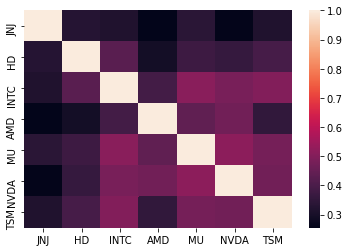

In [7]:
# Create a heatmap from the correlation values
sns.heatmap(correlation)

### Which semiconductor stock would be the best candidate to add to the existing portfolio?

`AMD` stock would be the best candidate to add to the existing portfolio as it is the stock that has the least correlation with `JNJ` and `HD`.